In [24]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='gensim.log', format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
import logging
logging.basicConfig(filename='gensim.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [30]:
import pickle

with open('token.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

In [71]:
data_lemmatized[1]

['room', 'warm', 'clean', 'living_room', 'decorate', 'nice']

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [36]:
print(id2word)

Dictionary(29569 unique tokens: ['center', 'charm', 'cozy', 'historical', 'house']...)


In [37]:
id2word.filter_extremes(no_below=10, no_above=0.5)

In [38]:
print(id2word)

Dictionary(7882 unique tokens: ['center', 'charm', 'cozy', 'historical', 'house']...)


In [39]:
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [194]:
with open('corpus.pkl', 'wb') as f:
    pickle.dump(corpus, f)

In [40]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 7882
Number of documents: 589173


In [41]:
num_topics = 10
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                chunksize=2000,
                                                passes=20, 
                                                alpha=[0.1]*num_topics,
                                                #eta=[0.01]*len(id2word.keys()),
                                                workers=7,
                                                iterations=400,
                                                #alpha='asymmetric',
                                                eta='auto',
                                                per_word_topics=True,
                                                #eval_every=1
                                                   )

In [96]:
import pickle
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

In [42]:
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.146*"perfect" + 0.123*"easy" + 0.109*"check" + 0.057*"communication" + '
  '0.050*"highly_recommend" + 0.030*"fantastic" + 0.030*"find" + 0.023*"quick" '
  '+ 0.015*"early" + 0.014*"fast"'),
 (1,
  '0.157*"host" + 0.061*"helpful" + 0.042*"friendly" + 0.026*"nice" + '
  '0.023*"help" + 0.023*"responsive" + 0.023*"kind" + 0.022*"give" + '
  '0.018*"need" + 0.017*"super"'),
 (2,
  '0.061*"close" + 0.038*"restaurant" + 0.029*"location" + 0.029*"area" + '
  '0.028*"place" + 0.027*"station" + 0.026*"walk" + 0.024*"neighborhood" + '
  '0.023*"convenient" + 0.019*"locate"'),
 (3,
  '0.088*"thank" + 0.078*"stay" + 0.066*"lovely" + 0.065*"enjoy" + '
  '0.059*"wonderful" + 0.043*"beautiful" + 0.030*"view" + 0.028*"apartment" + '
  '0.019*"city" + 0.018*"home"'),
 (4,
  '0.034*"home" + 0.032*"people" + 0.030*"feel" + 0.029*"room" + 0.029*"space" '
  '+ 0.026*"small" + 0.023*"little" + 0.017*"night" + 0.016*"big" + '
  '0.016*"sleep"'),
 (5,
  '0.133*"clean" + 0.070*"apartment" + 0.068*"n

In [43]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.184899  0.296951       1        1   5.843234
1      0.152302  0.091189       2        1  11.068275
2     -0.098149 -0.160485       3        1  14.380215
3     -0.183866  0.154418       4        1   7.284915
4      0.113356 -0.253425       5        1   9.772322
5     -0.074749 -0.200774       6        1  12.088492
6     -0.166936  0.116104       7        1  11.616110
7      0.112829 -0.043840       8        1   8.056112
8     -0.273824  0.035580       9        1   9.565528
9      0.234137 -0.035718      10        1  10.324798, topic_info=         Term          Freq         Total Category  logprob  loglift
26      great  76988.000000  76988.000000  Default  30.0000  30.0000
92       stay  78972.000000  78972.000000  Default  29.0000  29.0000
27   location  53327.000000  53327.000000  Default  28.0000  28.0000
96       host  44033.000000  44033.000000  Default  27.0000  27.0000
5       clean  40542.000000  40542.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
299      long   1590.054332   3329.163245  Topic10  -5.0946   1.5317
120      time   2237.740468  20558.510432  Topic10  -4.7529   0.0528
127  bathroom   1699.416088   6680.912177  Topic10  -5.0281   0.9017
12      night   1729.979848  10311.250415  Topic10  -5.0103   0.4855
9        room   1637.084032  24635.380769  Topic10  -5.0654  -0.4406

[529 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
585       1  0.107941       able
585       2  0.085992       able
585       3  0.152741       able
585       5  0.088397       able
585      10  0.564961       able
...     ...       ...        ...
829       5  0.999544     window
305       2  0.050911  wonderful
305       4  0.948932  wonderful
305       7  0.000088  wonderful
212      10  0.999879       work

[674 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.644728942041818

Coherence Score:  0.4422426827698428


In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, 
                                                        num_topics=num_topics, 
                                                        id2word=id2word, 
                                                        random_state=100,
                                                        chunksize=2000,
                                                        passes=20, 
                                                        alpha=[0.1]*num_topics,
                                                        #eta=[0.01]*len(id2word.keys()),
                                                        workers=7,
                                                        iterations=400,
                                                        #alpha='asymmetric',
                                                        eta='auto',
                                                        per_word_topics=True,
                                                       )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [46]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=5, limit=11, step=1)

In [102]:
with open('model_list.pkl', 'wb') as f:
    pickle.dump(model_list, f)

In [103]:
with open('coherence_values.pkl', 'wb') as f:
    pickle.dump(coherence_values, f)

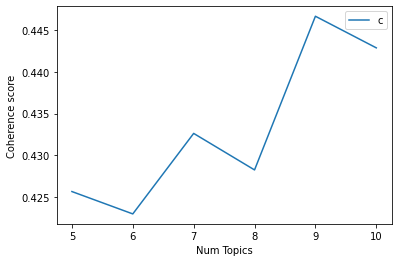

In [47]:
# Show graph
limit=11; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.078*"check" + 0.061*"easy" + 0.034*"highly_recommend" + '
  '0.028*"communication" + 0.027*"help" + 0.020*"arrive" + 0.020*"time" + '
  '0.017*"need" + 0.017*"get" + 0.016*"meet" + 0.013*"sure" + '
  '0.012*"accommodate" + 0.012*"quick" + 0.012*"arrival" + 0.012*"find"'),
 (1,
  '0.164*"host" + 0.063*"helpful" + 0.043*"friendly" + 0.027*"nice" + '
  '0.024*"kind" + 0.023*"give" + 0.023*"responsive" + 0.022*"excellent" + '
  '0.020*"provide" + 0.017*"super" + 0.017*"good" + 0.013*"need" + '
  '0.013*"extremely" + 0.011*"welcoming" + 0.011*"help"'),
 (2,
  '0.057*"close" + 0.036*"restaurant" + 0.033*"location" + 0.027*"place" + '
  '0.026*"station" + 0.025*"walk" + 0.024*"area" + 0.023*"neighborhood" + '
  '0.022*"convenient" + 0.019*"quiet" + 0.018*"locate" + 0.017*"shop" + '
  '0.015*"lot" + 0.015*"apartment" + 0.015*"nearby"'),
 (3,
  '0.070*"thank" + 0.053*"home" + 0.052*"lovely" + 0.051*"enjoy" + '
  '0.051*"stay" + 0.038*"amazing" + 0.036*"beautiful" + 0.029*"view" + '
  

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.085069 -0.162532       1        1  15.238818
6     -0.158221  0.225886       2        1  12.600177
5     -0.090945 -0.214429       3        1  12.587331
4      0.104207 -0.151077       4        1  11.561595
1      0.203993 -0.098431       5        1  10.800513
8     -0.260943 -0.063106       6        1  10.221723
7      0.126900  0.127188       7        1  10.184309
3     -0.138737  0.216943       8        1   8.940266
0      0.298815  0.119558       9        1   7.865267, topic_info=         Term          Freq         Total Category  logprob  loglift
26      great  77793.000000  77793.000000  Default  30.0000  30.0000
92       stay  78624.000000  78624.000000  Default  29.0000  29.0000
96       host  44569.000000  44569.000000  Default  28.0000  28.0000
27   location  53648.000000  53648.000000  Default  27.0000  27.0000
5       clean  40971.000000  40971.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
330   problem   1781.996615   3809.350537   Topic9  -4.7085   1.7830
130      find   2370.136453   8247.389761   Topic9  -4.4233   1.2958
131      need   3419.855843  23446.050851   Topic9  -4.0567   0.6176
138       day   1751.066547  11553.761283   Topic9  -4.7260   0.6559
204     super   1396.016820  12286.965272   Topic9  -4.9526   0.3678

[508 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
585       1  0.152944        able
585       4  0.205818        able
585       7  0.121877        able
585       9  0.519174        able
1057      2  0.713691  absolutely
...     ...       ...         ...
305       8  0.204166   wonderful
212       4  0.295731        work
212       7  0.704266        work
364       7  0.998012       worry
1517      2  0.997594        year

[657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 6, 5, 2, 9, 8, 4, 1])

In [53]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.4257
Num Topics = 6  has Coherence Value of 0.423
Num Topics = 7  has Coherence Value of 0.4326
Num Topics = 8  has Coherence Value of 0.4283
Num Topics = 9  has Coherence Value of 0.4466
Num Topics = 10  has Coherence Value of 0.4429


In [59]:
with open('content.pkl', 'rb') as f:
    content = pickle.load(f)

In [81]:
len(corpus)

589173

In [181]:
sentence_topics = []
for x in corpus:
    if len(x) != 0:
        topics = lda_model.get_document_topics(x)
        sentence_topics.append(topics)
    else:
        sentence_topics.append([])

In [182]:
# for each review, find topic with highest weight
highest_prob = []
topic_highest_prob = []
for topics_weights in sentence_topics: # for each list of topic-weight pairs
    if len(topics_weights) > 0:
        highest = max(pair[1] for pair in topics_weights) # find the highest weight
        toptopic = [pair[0] for pair in topics_weights if pair[1] == highest][0] # find the topic with the highest weight, may have ties, use only the first one

    else:
        highest = None
        toptopic = None
    highest_prob.append(highest)
    topic_highest_prob.append(toptopic)

In [65]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [183]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48387453, 0.69702494, 0.6833169, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...",[0.5249829],[3],1
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...",[],[],[],0
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...",[],[],[],0
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...",[],[],[],0


In [184]:
data['sentence_countdata'] = data.tokens_lemmatized.apply(lambda x: len(x))

In [185]:
data['sentence_topics'] = None
data['sentence_topics'] = data['sentence_topics'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'sentence_topics'] = sentence_topics[:n]
    sentence_topics = sentence_topics[n:]

In [186]:
data.head(20)

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48387453, 0.69702494, 0.6833169, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...",[0.5249829],[3],1
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...","[[(0, 0.010002318), (1, 0.010002845), (2, 0.01...",[],[],0
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...","[[(0, 0.011113217), (1, 0.0111141605), (2, 0.0...",[],[],0
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...","[[(0, 0.014297143), (1, 0.5399673), (2, 0.0142...",[],[],0
2790815,24278950,2018-08-25,I stayed 10 weeks and it was an amazing time. ...,42227491,2015-08-22,朝阳区 / Chaoyang,Beijing,39.90802,116.47451,28,...,"[[I, stayed, weeks, and, it, was, an, amazing,...","[[I, stayed, weeks, and, it, was, an, amazing,...","[[[stay, week, amazing, time]], [[come, defini...","[[stay, week, amazing, time], [come, definitel...",2,"[[(92, 1), (120, 1), (121, 1), (122, 1)], [(89...","[[(0, 0.02000116), (1, 0.02000167), (2, 0.0200...",[],[],0
2796858,35808221,2019-07-19,If you want an undisturbed place to have some ...,267980396,2019-06-12,丰台区 / Fengtai,Beijing,39.87726,116.29333,9,...,"[[If, you, want, an, undisturbed, place, to, h...","[[If, you, want, an, undisturbed, place, to, h...","[[[want, undisturbed, place, rest, choice]], [...","[[want, undisturbed, place, rest, choice], [si...",4,"[[(74, 1), (124, 1), (125, 1), (126, 1)], [(9,...","[[(0, 0.020003906), (1, 0.020002276), (2, 0.02...",[],[],0
2789698,22491534,2018-04-27,It was a nice experience for a short stay. Cle...,147186064,2017-08-22,西城区,Beijing,39.88863,116.38701,94,...,"[[It, was, a, nice, experience, for, a, short,...","[[It, was, a, nice, experience, for, a, short,...","[[[nice, experience, short, stay]], [[clean, r...","[[nice, experience, short, stay], [clean, room...",3,"[[(8, 1), (92, 1), (133, 1), (134, 1)], [(5, 1...","[[(0, 0.020000203), (1, 0.02

In [187]:
data['highest_prob'] = None
data['highest_prob'] = data['highest_prob'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'highest_prob'] = highest_prob[:n]
    highest_prob = highest_prob[n:]

In [188]:
data['topic_highest_prob'] = None
data['topic_highest_prob'] = data['topic_highest_prob'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'topic_highest_prob'] = topic_highest_prob[:n]
    topic_highest_prob = topic_highest_prob[n:]

In [189]:
# create a column for number of topics in each review
data['no_of_topics'] = data['sentence_topics'].apply(len)

In [190]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48389202, 0.69696486, 0.6833173, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...","[0.52498126, 0.6999252, 0.56430054, 0.6999982,...","[3, 4, 4, 5, 8, None]",6
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...","[[(0, 0.010002318), (1, 0.010002845), (2, 0.01...","[0.30998474, 0.36663064, 0.27567026, 0.5057822...","[5, 4, 8, 9, 9, 0, 1, 1, None, 7, 8, None]",12
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...","[[(0, 0.011113217), (1, 0.0111141605), (2, 0.0...","[0.4649354, 0.4198707, 0.34999582, 0.6744321, ...","[5, 8, 2, 6, None]",5
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...","[[(0, 0.014297143), (1, 0.5399673), (2, 0.0142...","[0.5399673, 0.39901915, 0.51673675, 0.51670337...","[1, 1, 9, 2, 1, 8, None]",7


In [191]:
with open('data_after_lda.pkl', 'wb') as f:
    pickle.dump(data, f)

In [193]:
lda_model.save('lda.model')